In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import openpathsampling as paths
import numpy as np

from openpathsampling.analysis.tis_analysis import TISTransition

storage = paths.storage.Storage("toy_tis.nc", mode="r")
print len(storage.sample)

3006


In [2]:
print len(storage.sampleset)
print len(storage.sample)

3001
3006


In [3]:
print storage.sampleset[0].samples

[<Sample @ 0x103cdff50>, <Sample @ 0x10c1d0050>, <Sample @ 0x10c1d0290>, <Sample @ 0x10c0ace10>, <Sample @ 0x10c0acc50>, <Sample @ 0x10c096610>]


In [4]:
ensembles=storage.ensemble[:]

In [5]:
ensembles

In [6]:
stateA = ensembles[1].ensembles[2].ensemble.volume.volume1
stateB = ensembles[1].ensembles[2].ensemble.volume.volume2
interfaces = [e.ensembles[1].ensemble2.volume for e in ensembles[:]]
op = ensembles[1].ensembles[0].ensemble.volume.orderparameter

In [7]:
lmax = [e.ensembles[1].ensemble2.volume.lambda_max for e in ensembles[:]]
print lmax

[-0.3, -0.25, -0.2, -0.13, -0.05, 0.0]


In [8]:
tis = TISTransition(stateA=stateA, stateB=stateB, orderparameter=op, interfaces=interfaces, name="A->B", storage=storage)

In [9]:
tis.ensembles = ensembles
for ensemble in tis.ensembles:
    ensemble.name = "I'face "+str(tis.ensembles.index(ensemble))

In [10]:
tis.ensemble_histogram_info['pathlength'].hist_args = { 'bin_width' : 5, 'bin_range' : (0, 100) }
tis.ensemble_histogram_info['max_lambda'].hist_args = { 'bin_width' : 0.02, 'bin_range' : (-0.35, 0.35) }

In [11]:
%%time
tis.all_statistics(samples=storage.sample, weights=None, force=True)

CPU times: user 1min 22s, sys: 2.4 s, total: 1min 24s
Wall time: 1min 33s


In [12]:
tis.histograms

{'max_lambda': {<openpathsampling.ensemble.SequentialEnsemble at 0x103cd58d0>: <openpathsampling.analysis.histogram.Histogram at 0x11206a490>,
  <openpathsampling.ensemble.SequentialEnsemble at 0x10c096110>: <openpathsampling.analysis.histogram.Histogram at 0x10f2355d0>,
  <openpathsampling.ensemble.SequentialEnsemble at 0x10c0ac0d0>: <openpathsampling.analysis.histogram.Histogram at 0x10c1d0b50>,
  <openpathsampling.ensemble.SequentialEnsemble at 0x10c0ac7d0>: <openpathsampling.analysis.histogram.Histogram at 0x10ff6cf10>,
  <openpathsampling.ensemble.SequentialEnsemble at 0x10c1d0490>: <openpathsampling.analysis.histogram.Histogram at 0x10ddfb1d0>,
  <openpathsampling.ensemble.SequentialEnsemble at 0x10c1d0a90>: <openpathsampling.analysis.histogram.Histogram at 0x110d2c250>},
 'pathlength': {<openpathsampling.ensemble.SequentialEnsemble at 0x103cd58d0>: <openpathsampling.analysis.histogram.Histogram at 0x1129f6410>,
  <openpathsampling.ensemble.SequentialEnsemble at 0x10c096110>: <op

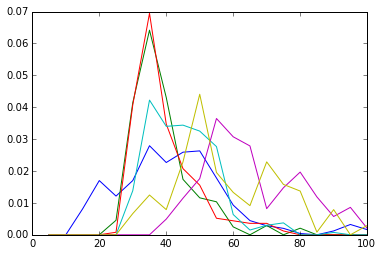

In [13]:
for ens in tis.ensembles:
    myhist = tis.histograms['pathlength'][ens]
    plt.plot(myhist.plot_bins(), myhist.normalized())

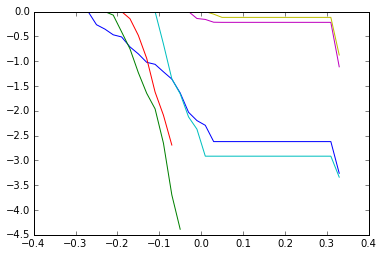

In [14]:
for ens in tis.ensembles:
    myhist = tis.histograms['max_lambda'][ens]
    plt.plot(myhist.plot_bins(), np.log(myhist.reverse_cumulative()))

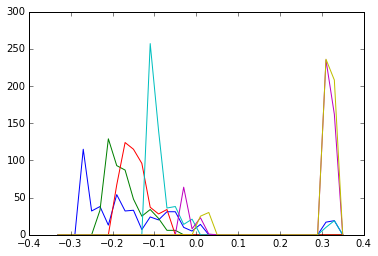

In [15]:
for ens in tis.ensembles:
    myhist = tis.histograms['max_lambda'][ens]
    plt.plot(myhist.plot_bins(), myhist())

In [16]:
import openpathsampling.toy_dynamics as toys
pes = (toys.toy_pes.OuterWalls([1.0, 1.0], [0.0, 0.0]) + 
       toys.toy_pes.Gaussian(2.0, [1.0, 4.0], [0.0,1.0]) + 
       toys.toy_pes.Gaussian(2.0, [25.0, 1.0], [0.0, -1.0])
      )
from toy_plot_helpers import ToyPlot
plot = ToyPlot()
plot.add_pes(pes)

In [17]:
ens0_traj = [s.trajectory for s in storage.sample if s.ensemble == tis.ensembles[0]]
len(ens0_traj)

495

In [18]:
ens0_acc = [s.details.accepted for s in storage.sample if s.ensemble == tis.ensembles[0]]

In [19]:
tot = 0
for acc in ens0_acc:
    tot += 1 if acc==True else 0
float(tot) / len(ens0_acc)

0.898989898989899

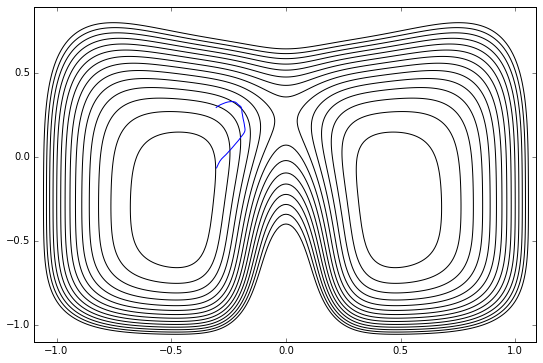

In [20]:
#plt.figure(figsize=(20,10))
plt.contour(plot.X, plot.Y, plot._pes, levels=np.arange(0.0, 1.5, 0.1), colors='k')
for mytraj in [ens0_traj[0]]:#[slice(None,None,10)]:
    plt.plot(mytraj.coordinates()[:,0,0], mytraj.coordinates()[:,0,1])

In [31]:
from openpathsampling.analysis.histogram import histograms_to_pandas_dataframe
df = histograms_to_pandas_dataframe(tis.histograms['max_lambda'].values(), fcn="reverse_cumulative").sort(axis=1)
df

,max_lambda A->B I'face 0,max_lambda A->B I'face 1,max_lambda A->B I'face 2,max_lambda A->B I'face 3,max_lambda A->B I'face 4,max_lambda A->B I'face 5
-0.33,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
-0.31,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
-0.29,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
-0.27,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
-0.25,0.767677,1.000000,1.000000,1.000000,1.000000,1.000000
-0.23,0.703030,1.000000,1.000000,1.000000,1.000000,1.000000
-0.21,0.626263,0.931677,1.000000,1.000000,1.000000,1.000000
-0.19,0.600000,0.664596,1.000000,1.000000,1.000000,1.000000
-0.17,0.490909,0.472050,0.866267,1.000000,1.000000,1.000000
-0.15,0.426263,0.291925,0.618762,1.000000,1.000000,1.000000


In [32]:
from openpathsampling.analysis.wham import WHAM
wham = WHAM()
wham.load_from_dataframe(df)
wham.clean_leading_ones()

In [33]:
from openpathsampling.analysis.wham import print_dict
print_dict(wham.hists)

-0.33 [0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
-0.31 [0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
-0.29 [0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
-0.27 [1.0, 0.0, 0.0, 0.0, 0.0, 0.0]
-0.25 [0.76767676767676762, 0.0, 0.0, 0.0, 0.0, 0.0]
-0.23 [0.70303030303030301, 1.0, 0.0, 0.0, 0.0, 0.0]
-0.21 [0.6262626262626263, 0.93167701863354047, 0.0, 0.0, 0.0, 0.0]
-0.19 [0.59999999999999998, 0.6645962732919255, 0.99999999999999989, 0.0, 0.0, 0.0]
-0.17 [0.49090909090909091, 0.47204968944099385, 0.86626746506986019, 0.0, 0.0, 0.0]
-0.15 [0.42626262626262629, 0.29192546583850931, 0.61876247504990012, 0.0, 0.0, 0.0]
-0.13 [0.35959595959595958, 0.19254658385093168, 0.3892215568862275, 0.0, 0.0, 0.0]
-0.11 [0.34545454545454546, 0.14078674948240166, 0.19760479041916165, 1.0, 0.0, 0.0]
-0.09 [0.29696969696969699, 0.070393374741200831, 0.12375249500998003, 0.51962616822429908, 0.0, 0.0]
-0.07 [0.25656565656565655, 0.024844720496894412, 0.067864271457085817, 0.25794392523364484, 0.0, 0.0]
-0.05 [0.19393939393939394, 0.012422360248447206, 

In [34]:
wham.pre_guess()

{0: -0.26999999999999996,
 1: -0.22999999999999998,
 2: -0.18999999999999997,
 3: -0.10999999999999999,
 4: -0.029999999999999971,
 5: 0.010000000000000009,
 6: 0.35000000000000009}

In [35]:
wham_hist = wham.wham_bam_histogram()

0 -0.27 [1.0, 0.0, 0.0, 0.0, 0.0, 0.0]
1 -0.23 [0.70303030303030301, 1.0, 0.0, 0.0, 0.0, 0.0]
2 -0.19 [0.59999999999999998, 0.6645962732919255, 0.99999999999999989, 0.0, 0.0, 0.0]
3 -0.11 [0.34545454545454546, 0.14078674948240166, 0.19760479041916165, 1.0, 0.0, 0.0]
4 -0.03 [0.13131313131313133, 0.0, 0.0, 0.11962616822429907, 1.0, 0.0]
5 0.01 [0.10101010101010101, 0.0, 0.0, 0.054205607476635519, 0.8539553752535497, 0.99999999999999989]
6 0.35 [0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[1.0, 0.70303030303030301, 0.6645962732919255, 0.19760479041916165, 0.11962616822429907, 0.8539553752535497]


In [38]:
print_dict(wham_hist)

-0.27 1.0
-0.25 0.767676767677
-0.23 0.927308817717
-0.21 0.848306203132
-0.19 0.762219267798
-0.17 0.615682144259
-0.15 0.449991680369
-0.13 0.316844933355
-0.11 0.36191540477
-0.09 0.217242542119
-0.07 0.152611055556
-0.05 0.143422681782
-0.03 0.0678171614616
-0.01 0.0582654998119
0.01 0.0554691946525
0.03 0.0520171960356
0.05 0.0503013964558
0.07 0.0503013964558
0.09 0.0503013964558
0.11 0.0503013964558
0.13 0.0503013964558
0.15 0.0503013964558
0.17 0.0503013964558
0.19 0.0503013964558
0.21 0.0503013964558
0.23 0.0503013964558
0.25 0.0503013964558
0.27 0.0503013964558
0.29 0.0503013964558
0.31 0.0503013964558
0.33 0.0222253278893


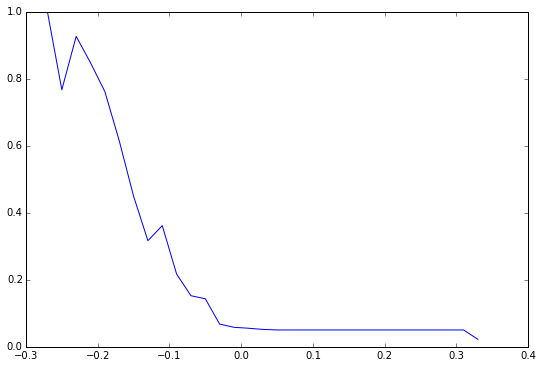

In [52]:
wham_hist_list = [ (k, wham_hist[k]) for k in sorted(wham_hist.keys()) ]
plt.plot(list(zip(*wham_hist_list)[0]), list(zip(*wham_hist_list)[1]))

In [36]:
from openpathsampling.analysis.histogram import histograms_to_pandas_dataframe
df = histograms_to_pandas_dataframe(tis.histograms['max_lambda'].values())
df

,max_lambda A->B I'face 1,max_lambda A->B I'face 5,max_lambda A->B I'face 0,max_lambda A->B I'face 2,max_lambda A->B I'face 4,max_lambda A->B I'face 3
-0.33,0,0,0,0,0,0
-0.31,0,0,0,0,0,0
-0.29,0,0,0,0,0,0
-0.27,0,0,115,0,0,0
-0.25,0,0,32,0,0,0
-0.23,33,0,38,0,0,0
-0.21,129,0,13,0,0,0
-0.19,93,0,54,67,0,0
-0.17,87,0,32,124,0,0
-0.15,48,0,33,115,0,0
